# Predicting House Prices#
## Regression Project ##


## Table of contents
* [Introduction: Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Exploratory Data Analysis](#analysis)
* [Results and Conclusion](#results)

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image

from scipy.stats import boxcox
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

# Introduction: Problem<a name="introduction"></a>

## House Prices: Advanced Regression Techniques
The dataset for this project was acquired from Kaggle and it describes the sale of individual residential property in Ames, Iowa 

In this project, we'll predict house prices by training a <b>regression</b> model

We'll select features from the dataset which have a high correlation with the <b>Sale Price</b>, our target variable. 



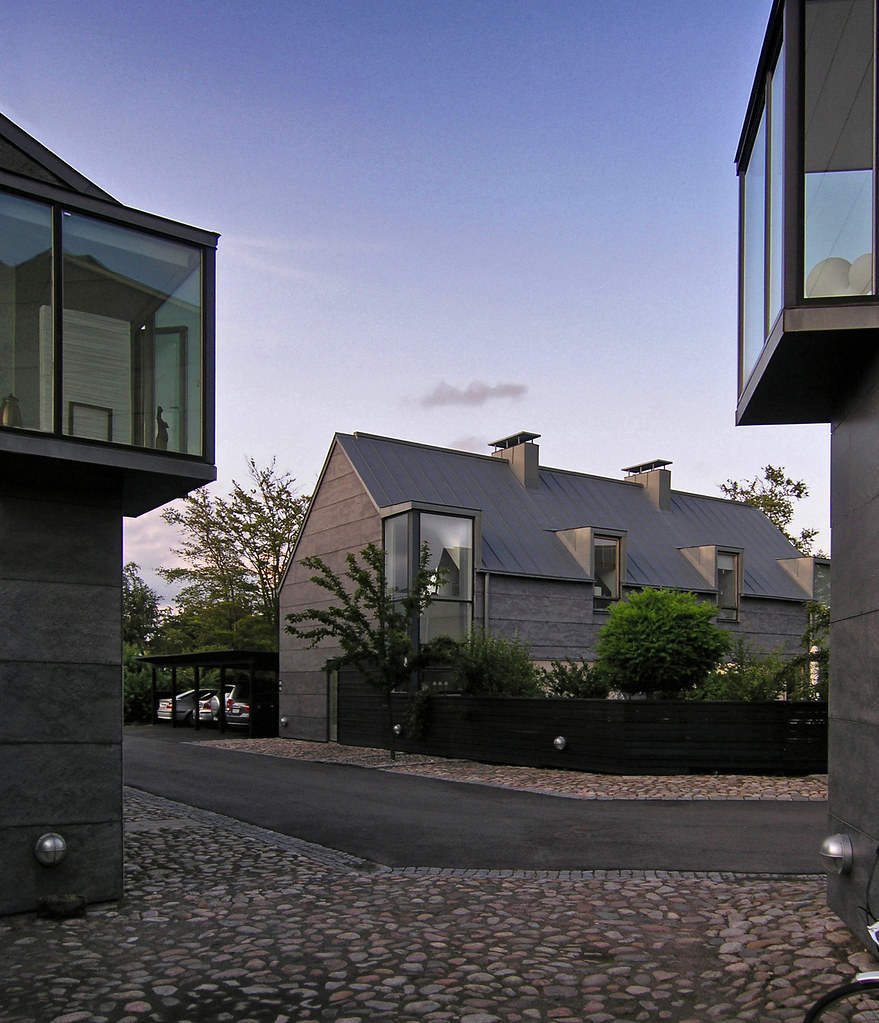

In [2]:
Image("Housing Prices.jpg")

"tegnestuen vandkunsten, architects: tre gudor housing, viken 2000" by seier+seier is licensed under CC BY-NC 2.0

# Data<a name="data"></a>

#### Load the Data, Examine and Explore

In [3]:
## Load in the Ames Housing Data
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

#### Let's analyse the features of this dataset

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# This is recommended by the data set author to remove a few outliers
data = df_train.copy() # Keep a copy our original data 
df_test = df_test.loc[df_test['GrLivArea'] <= 4000,:]
df_train = df_train.loc[df_train['GrLivArea'] <= 4000,:]
print("Number of rows in the data:", df_train.shape[0])
print("Number of columns in the data:", df_train.shape[1])

Number of rows in the data: 1456
Number of columns in the data: 81


#### We have 79 features that describe features of the house### 



### Normalizing Target Variable
Let's inspect the <b>Sale Price</b>, the target variable

In [6]:
SP = df_train['SalePrice']
SP.describe()

count      1456.000000
mean     180151.233516
std       76696.592530
min       34900.000000
25%      129900.000000
50%      163000.000000
75%      214000.000000
max      625000.000000
Name: SalePrice, dtype: float64

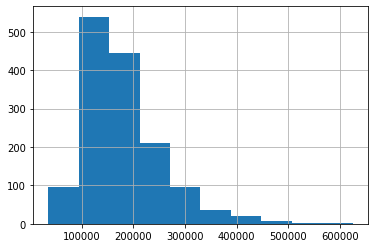

In [7]:
SP.hist()

In [8]:
SP_sample = SP.sample(n=50,random_state = 1)
normaltest(SP_sample)

NormaltestResult(statistic=48.77156502307902, pvalue=2.566783378742388e-11)

Making our target variable normally distributed often will lead to better results

Sale Price is not normally distributed, we will apply a transformation to it and then fit our regression to predict the transformed values

It's not necessary for the Linear Regression algorithm to have a y variable that is normally distributed; however, it is necessary for the errors to be normally distributed and one way to ensure this is by transforming the y variable

We'll use <b>histograms</b> and the <b>D'Agostino K^2 Test</b> to determine normality




There are three transformations that we can apply:
<b></b>
<li>Square root
<li>Log
<li>Box cox

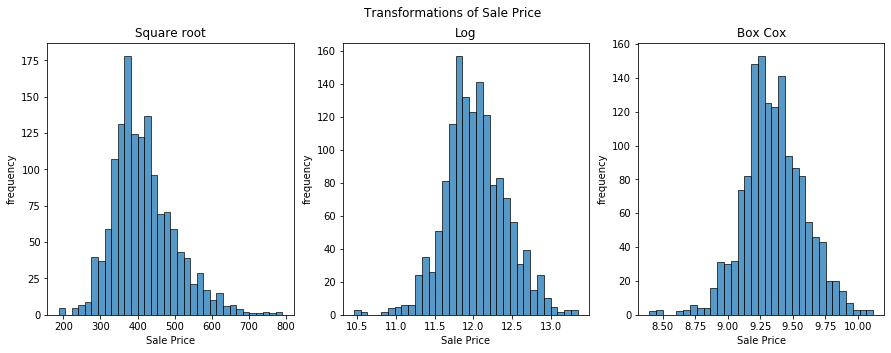

In [9]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
# Applying transforms
SP_sq = np.sqrt(SP)
SP_log = np.log(SP)
SP_Bxc_result = boxcox(SP)
SP_Bxc = SP_Bxc_result[0]

# Displaying Histograms alongisde statistical score
# SP_sq.hist(ax = ax1)
# SP_log.hist(ax = ax2)
# SP_Bxc.hist(ax = ax3)

sns.histplot(data = SP_sq, ax = ax1)
sns.histplot(data = SP_log, ax = ax2)
sns.histplot(data = SP_Bxc, ax = ax3)

# formatting of titles
ax1.set(title='Square root', ylabel='frequency', xlabel='Sale Price')
ax2.set(title='Log', ylabel='frequency', xlabel='Sale Price')
ax3.set(title='Box Cox', ylabel='frequency', xlabel='Sale Price')
fig.suptitle('Transformations of Sale Price');

Computing D'Agostino K^2 test results

#### Interpreting the D'Agostino K^2 score
This test outputs a "p-value". The larges the p-value, the closer the distribution is to normal.

We will take a <b>small sample</b> of each distribution as the test detects even minor deviations in very large samples.


In [10]:
SP_sq_sample = np.random.choice(SP_sq, 50)
SP_log_sample = np.random.choice(SP_log, 50)
SP_Bxc_sample = np.random.choice(SP_Bxc, 50)

normaltest_sq = normaltest(SP_sq_sample)[1]
normaltest_log = normaltest(SP_log_sample)[1]
normaltest_Bxc = normaltest(SP_Bxc_sample)[1]

In [11]:
column = {'Transformation' :['Square Root','Log','Box Cox'],
         'D\'Agostino K^2 Score (p-value)': [normaltest_sq,normaltest_log,normaltest_Bxc]}
normal_scores_df = pd.DataFrame(column)
normal_scores_df.set_index('Transformation')

,D'Agostino K^2 Score (p-value)
Transformation,
Square Root,0.000858
Log,0.492470
Box Cox,0.383001


According to frequentist statistics we can the distribution to be normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


According to our scores, the p values of Log and Box Cox Transformations are <b>above 0.05</b> and since the p value of Box Cox is higher than Log we'll apply the Box Cox transformation to our target variable

In [12]:
df_train['SalePrice'] = SP_Bxc

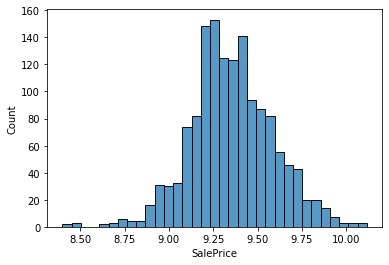

In [13]:
sns.histplot(data = df_train['SalePrice'])

### Handling Missing Data

We'll extract columns that have missing values

In [14]:
missing_percent = []
missing_percent_cols = []
for col_count,col in zip(df_train.count(),df_train.columns):
    percent = ((1456-col_count)/1456) * 100
    if percent != 0:
        missing_percent.append(percent)
        missing_percent_cols.append(col)
columns = {"Column":missing_percent_cols, "% Of Missing Value": missing_percent}
missing_df = pd.DataFrame(columns)
missing_df

,Column,% Of Missing Value
0,LotFrontage,17.788462
1,Alley,93.750000
2,MasVnrType,0.549451
3,MasVnrArea,0.549451
4,BsmtQual,2.541209
5,BsmtCond,2.541209
6,BsmtExposure,2.609890
7,BsmtFinType1,2.541209
8,BsmtFinType2,2.609890
9,Electrical,0.068681


Let's remove columns with more than 75% of missing values

In [15]:
missing_df[missing_df['% Of Missing Value'] > 75]

missing_cols_75 = missing_df[missing_df['% Of Missing Value'] > 75]
missing_cols_75_cols = missing_cols_75['Column'].tolist()

missing_cols_75

,Column,% Of Missing Value
1,Alley,93.750000
16,PoolQC,99.656593
17,Fence,80.769231
18,MiscFeature,96.291209


In [16]:
missing_cols_75 = missing_df[missing_df['% Of Missing Value'] > 75]
missing_cols_75_cols = missing_cols_75['Column'].tolist()

df_train.drop(missing_cols_75_cols, axis = 1, inplace = True)
df_test.drop(missing_cols_75_cols, axis = 1, inplace = True)

#### Let's Impute Categorical Missing Values

In [17]:
df_train['LotFrontage'].describe()

count    1197.000000
mean       69.693400
std        23.054474
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [18]:
df_train.loc[df_train['LotFrontage'].isna(),'LotFrontage'] = df_train['LotFrontage'].mean()

In [19]:
df_train.loc[df_train['MasVnrType'].isna(),'MasVnrType'] = df_train['MasVnrType'].mode()[0]

In [20]:
df_train['MasVnrArea'].describe()

count    1448.000000
mean      102.087707
std       177.338930
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

'MasVnrArea' has a large standard deviation; it's advisable to impute the missing values with the median

In [21]:
df_train.loc[df_train['MasVnrArea'].isna(),'MasVnrArea'] = df_train['MasVnrArea'].median()

In [22]:
df_train.loc[df_train['BsmtQual'].isna(),'BsmtQual']
df_train['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    117
Fa     35
Name: BsmtQual, dtype: int64

In [23]:
df_train.loc[df_train['BsmtQual'].isna(),'BsmtQual'] = df_train['BsmtQual'].mode()[0]

In [24]:
df_train.loc[df_train['BsmtCond'].isna(),'BsmtCond'] = df_train['BsmtCond'].mode()[0]

In [25]:
df_train['BsmtExposure'].value_counts()

No    953
Av    220
Gd    131
Mn    114
Name: BsmtExposure, dtype: int64

In [26]:
df_train.loc[df_train['BsmtExposure'].isna(),'BsmtExposure'] = df_train['BsmtExposure'].mode()[0]

df_train.loc[df_train['BsmtExposure'].isna(),'BsmtExposure']

Series([], Name: BsmtExposure, dtype: object)

In [27]:
df_train['BsmtExposure'].describe()

count     1456
unique       4
top         No
freq       991
Name: BsmtExposure, dtype: object

In [28]:
df_train['BsmtFinType1'].value_counts()

Unf    430
GLQ    414
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64

In [29]:
df_train.loc[df_train['BsmtFinType1'].isna(),'BsmtFinType1'] = df_train['BsmtFinType1'].mode()[0]

In [30]:
df_train.loc[df_train['BsmtFinType2'].isna(),'BsmtFinType2'] = df_train['BsmtFinType2'].mode()[0]

In [31]:
df_train['Electrical'].value_counts()

SBrkr    1330
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [32]:
df_train.loc[df_train['Electrical'].isna(), 'Electrical'] = df_train['Electrical'].mode()[0]

In [33]:
df_train['FireplaceQu'].value_counts()

Gd    378
TA    312
Fa     33
Ex     23
Po     20
Name: FireplaceQu, dtype: int64

In [34]:
df_train['Fireplaces'].value_counts()

0    690
1    649
2    113
3      4
Name: Fireplaces, dtype: int64

No meaningful extrapolation can be made from other columns to fill up the 'FireplaceQu' column.
Nearly 50% of categorical data is missing


In [35]:
df_train.drop('FireplaceQu', axis = 1, inplace = True)

In [36]:
df_train['GarageType'].value_counts()

Attchd     867
Detchd     387
BuiltIn     87
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [37]:
df_train.loc[df_train['GarageType'].isna(), 'GarageType'] = df_train['GarageType'].mode()[0]

In [38]:
df_train['GarageYrBlt'].describe()

count    1375.000000
mean     1978.440000
std        24.692738
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

Since the standard deviation isn't too large we can impute the missing values with the mean

In [39]:
df_train.loc[df_train['GarageYrBlt'].isna(),'GarageYrBlt'] = df_train['GarageYrBlt'].mean()

In [40]:
df_train.loc[df_train['GarageFinish'].isna(),'GarageFinish'] = df_train['GarageFinish'].mode()[0]

In [41]:
df_train.loc[df_train['GarageQual'].isna(),'GarageQual'] = df_train['GarageQual'].mode()[0]

In [42]:
df_train.loc[df_train['GarageCond'].isna(),'GarageCond'] = df_train['GarageCond'].mode()[0]

In [43]:
df_train.isna().sum().sum()

0

#### All of the missing data has been handled

### Transforming predictor variables for optimal model performance

We'll extract continuous predictor variables that are skewed and apply a log transform to make them more normally distributed

In [44]:
# Collecting float variables
mask = df_train.dtypes != np.object
float_cols = df_train.columns[mask]

# Identifying variables that are skewed
skew_values = df_train[float_cols].skew()

skew_cols = (skew_values
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > 0.7'))

skew_cols

,Skew
MSSubClass,1.406366
LotFrontage,1.694146
LotArea,12.587561
MasVnrArea,2.657499
BsmtFinSF1,0.744855
BsmtFinSF2,4.248587
BsmtUnfSF,0.921759
1stFlrSF,0.867081
2ndFlrSF,0.777866
LowQualFinSF,8.998564


In [45]:
for col in skew_cols.index.tolist():
    if col == "SalePrice":
        continue
    df_train[col] = df_train[col].apply(np.log1p)
    df_test[col]  = df_test[col].apply(np.log1p)

One hot encoding categorical variables

In [46]:
data_copy1 = df_train.copy()
# pd.Series containing all the string categoricals
ohc_cols = df_train.dtypes[df_train.dtypes == np.object]  # filtering by string categoricals
ohc_cols = ohc_cols.index.tolist()  # list of categorical fields

# Here we see another way of one-hot-encoding:
# Encode these columns as categoricals so one hot encoding works on split data (if desired)
# for col in one_hot_encode_cols:
#     data[col] = pd.Categorical(data[col])

# Do the one hot encoding
df_train = pd.get_dummies(df_train, columns=ohc_cols)

print('Number of Columns before one hot encoding = ',data_copy1.shape[1],'and number of columns after one hot encoding = ', df_train.shape[1])

Number of Columns before one hot encoding =  76 and number of columns after one hot encoding =  271
